# Making into dataset


* Need to take the 256 3 256 data array into a flattern array
* Make dataset into numpy array

In [1]:
#importing the useful libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Making the images into a dataset

the images will be in key 0 catagories in key 1 
* data[0] will return all the images 
* data[1] will return all the catagories

In [2]:
# This is just making a labled dataset
data = tf.keras.utils.image_dataset_from_directory("dataset",batch_size=672) 
# creates a labled dataset can change the batch size for speed and image size can be set using image_size=(100,100) 
# The batch size is just all the data so will have to make much bigger with more data as currently only have 672 items
data1 = data.as_numpy_iterator() #converts to a numpy iterators
batch = data1.next() # gets the next 32 items16

# Making the labled data set into two numpy arrays 
[x, y ] = [batch[0],batch[1]]
x_in = np.array(x)
y_in = np.array(y)


Found 672 files belonging to 4 classes.


# Showing off a sample of the labled dataset

This is just for clarification of the labled sets name and association

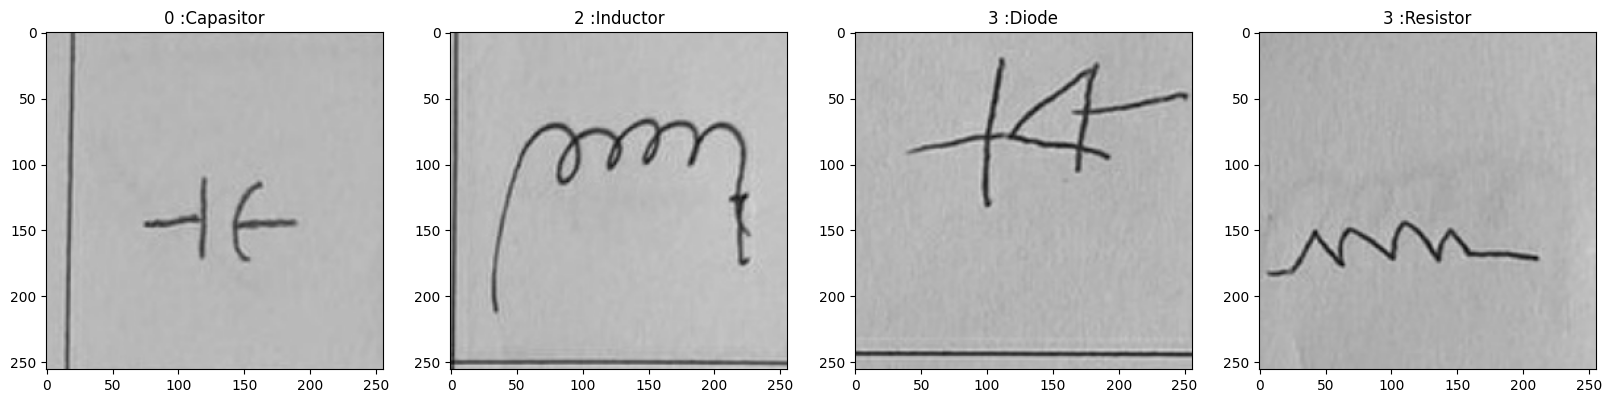

In [61]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

caps_idx = np.where(y == 0)[0][0] 
caps_img = x_in[caps_idx]
ax[0].title.set_text(str(0) +" :Capasitor")
ax[0].imshow(caps_img.astype(int))


inducts_idx = np.where(y ==2)[0][0]
inducts_img = x_in[inducts_idx]
ax[1].title.set_text(str(2) +" :Inductor")
ax[1].imshow(inducts_img.astype(int))

diode_idx = np.where(y ==1)[0][0]
diode_img = x_in[diode_idx]
ax[2].title.set_text(str(3) +" :Diode")
ax[2].imshow(diode_img.astype(int))

resist_idx = np.where(y == 3)[0][0]
resist_img = x_in[resist_idx]

ax[3].title.set_text(str(3) +" :Resistor")
ax[3].imshow(resist_img.astype(int))


# Preproccessing the Data

Steps 
* scale the data from 0-255 to 0-1. this will help account for brightness and stuffs


In [4]:
X_scaled = x_in/255

# This is where you will do all you magic 

'dataScaled = data.map(lambda x, y: (x/255, y)) #scales all the data between 0 and 1 better for generilisation note need to do this on the pipelined data  \nbatch = (dataScaled.as_numpy_iterator().next())[0]\nbatch[0].max()'

# Splitting the data into data, testing and validation

old code

"""
len(data) # the number of batches
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 # had to add them all up to total batch size a better way to do this def exists
print(train_size,test_size,val_size)"""

#test  = tf.keras.layers.Flatten()(np.array(batch[0]))

""""
train = data.take(train_size) # splitting up the data between the 3 secitons
val = data.skip(train_size).take(val_size)
testData = data.skip(test_size).skip(val_size).take(test_size+1)
""" 

# This is a three way split to split the data into testing and validation

Makes an equal split of data for training testing and validation \
currently 222 222 222 split

In [5]:

X_train, X_TestAndValid, Y_train, Y_TestAndValid = train_test_split(X_scaled, y_in, test_size=0.66) # splits the whole data into 1/3 for X_train
X_val, X_test, Y_val, Y_test = train_test_split(X_TestAndValid, Y_TestAndValid, test_size=0.5) # split the train and val into 1/3 each
np.shape(X_train[0])

(256, 256, 3)

# Begining the buidling the model 
* Sequential model type
* with lots of different types of layers
* Size of the input shape is up to you see np.shape(X_train[0]) to see size

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout

In [7]:
model = Sequential()

# All you have to do is to make the system into the correct size
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape= (256, 256, 3))) #making a convolutional layer with number of filters = 16, 3x3 window , moves 1 pixel at a time 
model.add(MaxPooling2D()) # max pooling values returns the max value of the highest relu makes much faster

model.add(Conv2D(32,(3,3),1, activation = 'relu')) # another filter layer
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu')) # another filter layer
model.add(MaxPooling2D())


model.add(Flatten()) # flatterns the data down condenses rows and width

model.add(Dense(256, activation= 'relu')) # fully connected layers with 256 neurons
model.add(Dense(4, activation='sigmoid')) # a signle values output might have to change this    

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.compile('adam',  loss=tf.keras.losses.MeanSquaredLoss()  , metrics=['accuracy']) # using the adam optimiser with losses being 2 values - will have to cahnge this 


c:\Users\tlgwo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Displaying what the model looks like

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training the data

In [9]:
logsdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir) # estabilishing a log directory

# Fitting the data (training)

In [62]:
hist = model.fit(X_train, Y_train, epochs = 10, validation_data=[X_val,Y_val])


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9202 - loss: 0.3346 - val_accuracy: 0.9009 - val_loss: 0.4461
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9481 - loss: 0.1898 - val_accuracy: 0.8964 - val_loss: 0.4142
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9675 - loss: 0.1181 - val_accuracy: 0.9054 - val_loss: 0.4978
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.9810 - loss: 0.1135 - val_accuracy: 0.9189 - val_loss: 0.4329
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 1.0000 - loss: 0.0356 - val_accuracy: 0.9279 - val_loss: 0.6016
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9279 - val_loss: 0.6981
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9324 - val_loss: 0.6519
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9324 - val_loss:

# plotting the preformance

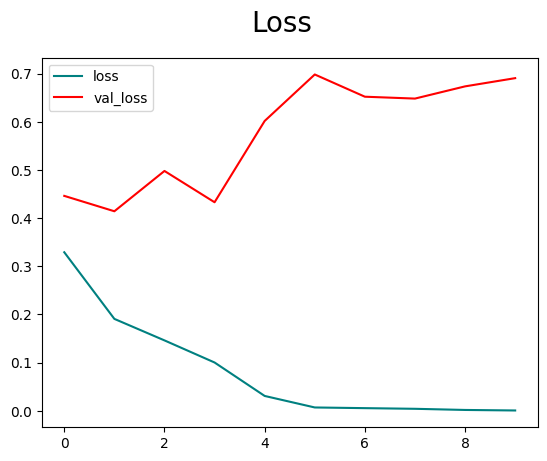

In [63]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')

fig.suptitle("Loss", fontsize = 20)
plt.legend()
plt.show()

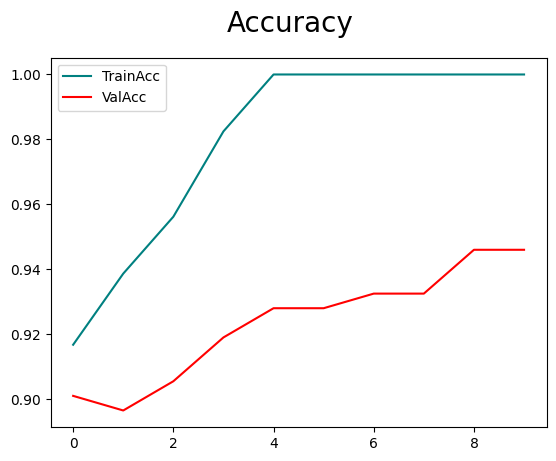

In [64]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'TrainAcc')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'ValAcc')

fig.suptitle("Accuracy", fontsize = 20)
plt.legend()
plt.show()

# Evaluation
Want to see how well this works on testing data

old code 
from tensorflow.keras.metrics import Precision, Recall ,  SparseCategoricalCrossentropy
#pre = Precision()
#re = Recall()
acc = SparseCategoricalCrossentropy()#SparseCategoricalCrossentropy() # might have to change this when we have more than 2 cats

In [65]:
loss, accuracy = model.evaluate(X_test, Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9573 - loss: 0.4512


In [66]:
#print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


print("Loss" + str(loss), "accuracy"+ str(accuracy))

Loss0.45869454741477966 accuracy0.954954981803894


# Testing one more operation

This is just proof that it works

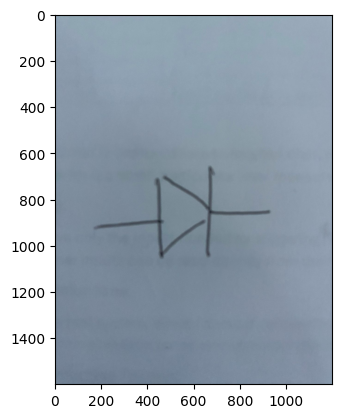

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.9949569  0.7163209  0.01335468 0.97166777]]
0


In [70]:
#img = cv.imread("RandomCapTest.jpg")
#img = cv.imread("DiodeTest.jpeg")
resize = tf.image.resize(img,(256,256))
plt.imshow(img)
plt.show()


yhat = np.array(model.predict(np.expand_dims(resize/255,0))) # putting in in a list the nn can deal with not getting a batch
# note if greater that 0.5 it will be a R else cap
print(yhat)
cat = yhat.argmax()
print(cat)

# 